徐州市逐年PM2.5含量数据分析 & 数据可视化 & 使用回归模型预测

判断本地是否已有数据，若无数据，则爬取徐州市历年PM2.5每日数据

In [1]:
import time,requests,re
import os
import pandas as pd
from lxml import etree

def get_data():
    url='http://www.tianqihoubao.com/aqi/xuzhou.html'
    headers={'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18362", }
    response=requests.get(url, headers=headers)
    html=response.text
    response=etree.HTML(html)
    url_list=response.xpath('//div[@class="box p"]//a/@href')
    for url in url_list:
        url='http://www.tianqihoubao.com'+url
        data=pd.read_html(url, header=0, encoding='gbk')[0]
        # print(data)
        time.sleep(1)
        data.to_csv("pm2.5_xuzhou2022.csv",mode='a', header=False)


#判断本地是否已有数据，若无则运行爬虫
if(os.path.exists("pm2.5_xuzhou2022.csv")==False):
    get_data()
else:
    print("本地已有数据！")


本地已有数据！


In [2]:
filename = "pm2.5_xuzhou2022.csv"
df=pd.read_csv(filename,names=['date','quality','AQI','ranking','PM2.5(μg/m3)','Pm10(μg/m3)','So2(μg/m3)','No2(μg/m3)','Co(mg/m3)','O3(μg/m3)'])
df   

#经验证爬取的文件无缺失和异常数据，故无需进行处理

#获取的数据如下，数据有 date、qulaity、AQI、ranking、PM2.5 等字段

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3)
0,2022-08-01,优,40,167,20,40,6,17,0.50,76
1,2022-08-02,优,46,212,23,43,6,17,0.50,85
2,2022-08-03,良,59,304,32,55,7,16,0.55,116
3,2022-08-04,良,58,316,31,54,6,15,0.54,121
4,2022-08-05,良,51,296,28,52,6,16,0.57,117
...,...,...,...,...,...,...,...,...,...,...
29,2013-11-30,轻度污染,101,69,102,175,91,67,1.67,20
0,2013-10-28,轻度污染,117,43,87,131,51,67,1.54,69
1,2013-10-29,中度污染,164,79,125,188,96,93,2.53,53
2,2013-10-30,良,63,23,38,74,73,56,1.51,24


In [3]:
#把时间字符串转为索引
df['time_index']=pd.to_datetime(df['date']) 
df.set_index('time_index',inplace=True)
df
#可以看到时间索引在最左边

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3)
time_index,,,,,,,,,,
2022-08-01,2022-08-01,优,40,167,20,40,6,17,0.50,76
2022-08-02,2022-08-02,优,46,212,23,43,6,17,0.50,85
2022-08-03,2022-08-03,良,59,304,32,55,7,16,0.55,116
2022-08-04,2022-08-04,良,58,316,31,54,6,15,0.54,121
2022-08-05,2022-08-05,良,51,296,28,52,6,16,0.57,117
...,...,...,...,...,...,...,...,...,...,...
2013-11-30,2013-11-30,轻度污染,101,69,102,175,91,67,1.67,20
2013-10-28,2013-10-28,轻度污染,117,43,87,131,51,67,1.54,69
2013-10-29,2013-10-29,中度污染,164,79,125,188,96,93,2.53,53


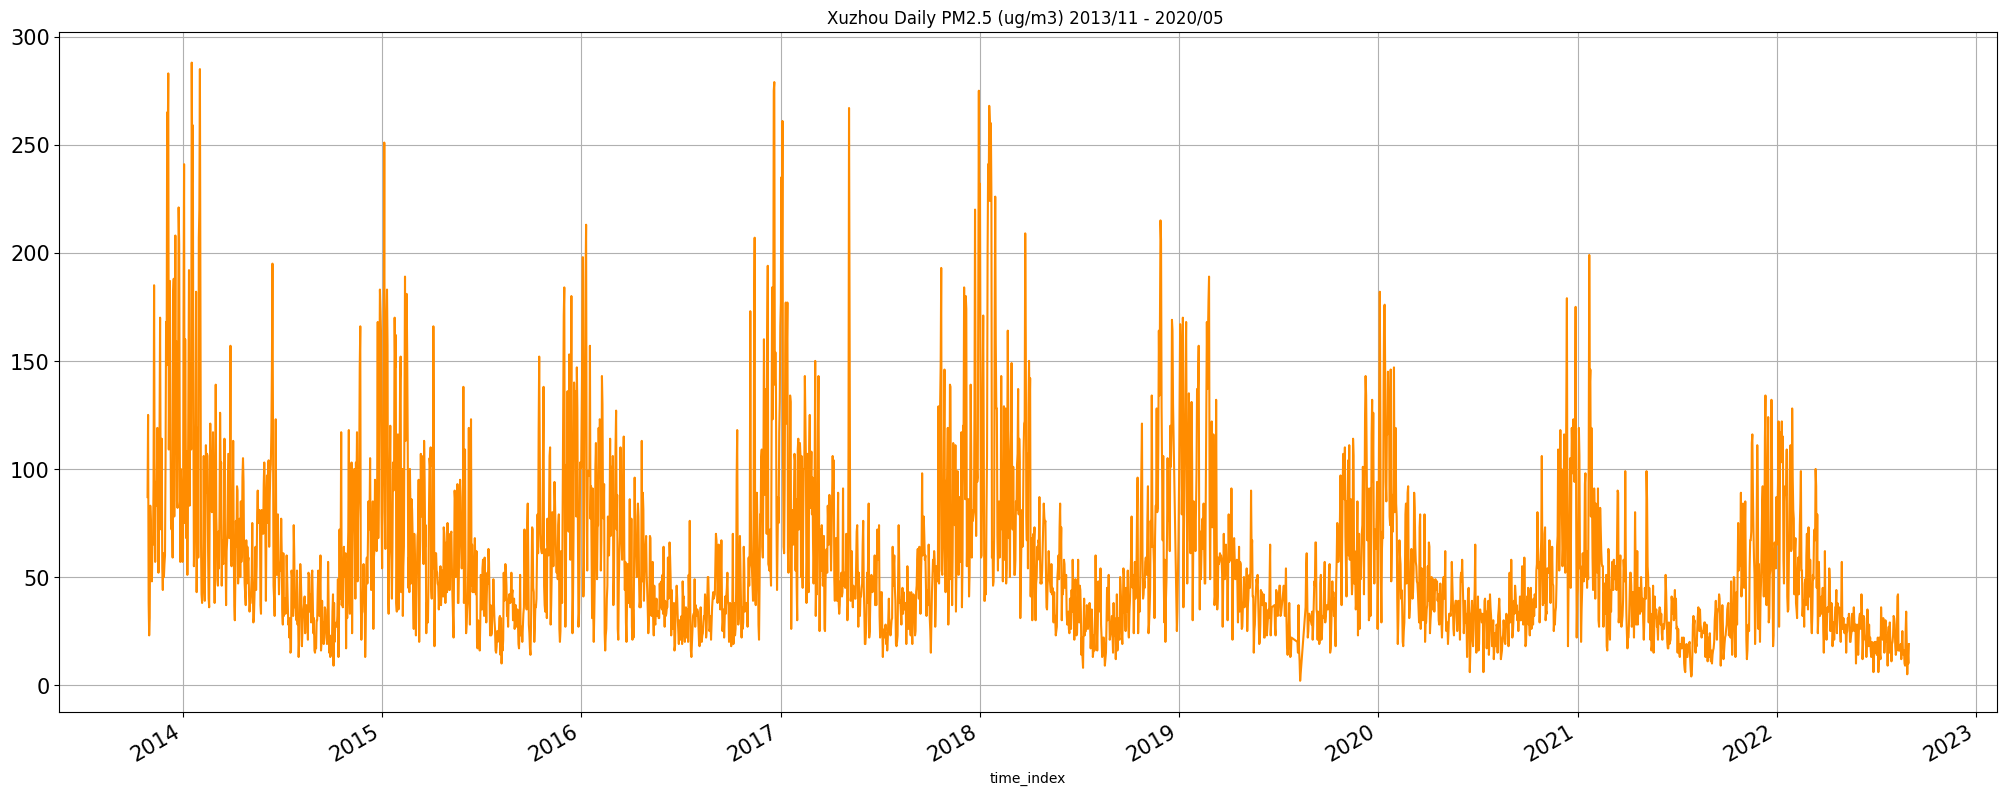

In [4]:
#将每日数据绘制成折线图
plot=df['PM2.5(μg/m3)'].plot(figsize=(25,10),title="Xuzhou Daily PM2.5 (ug/m3) 2013/11 - 2020/05 ",color='darkorange', grid=True,fontsize=15)
fig=plot.get_figure()
fig.savefig("Xuzhou Daily PM2.5.png")

#数据太密集，无法看出数据的趋势，数据需要处理

C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_30068\712108434.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=df.resample('M').mean()     #月份采样，取月平均值


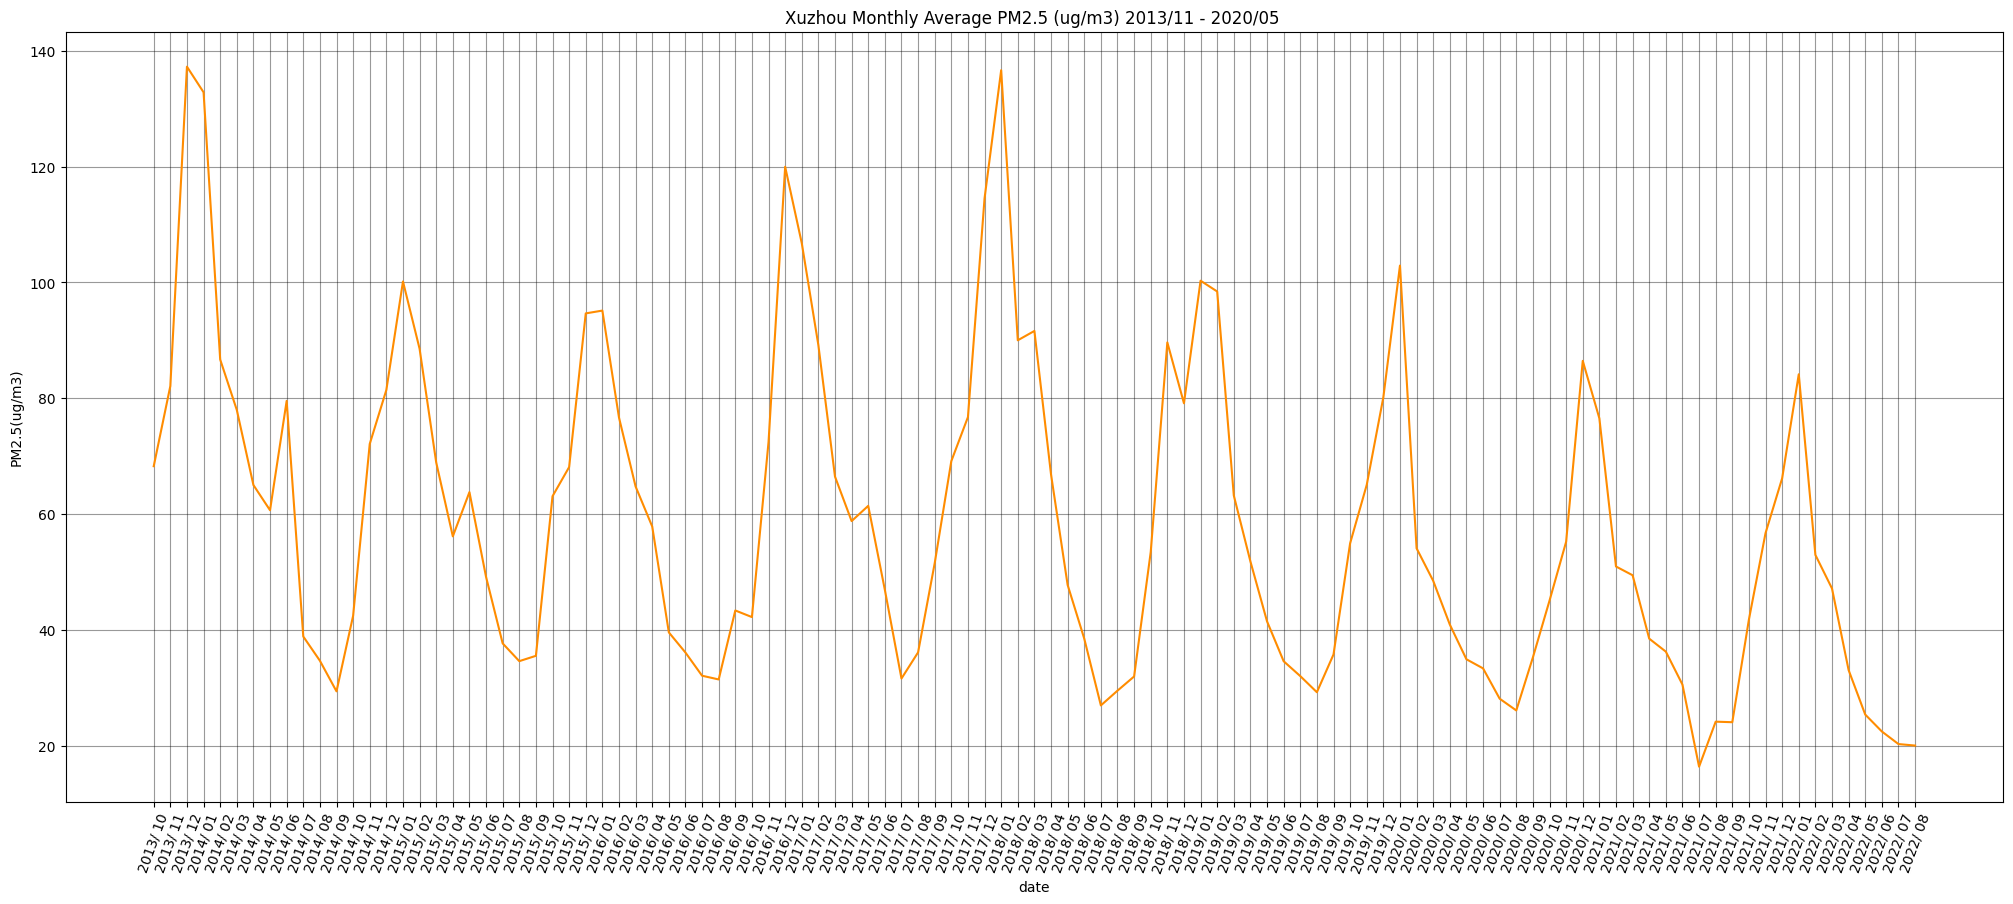

In [5]:
import matplotlib.pyplot as plt

#降低数据采样频率
df1=df.resample('M').mean()     #月份采样，取月平均值
 
#绘制折线图：
plt.figure(figsize=(25,10))
data=df1['PM2.5(μg/m3)']
#print(data.index)
#print(data.values)
 
_x=data.index
_y=data.values
_x = [i.strftime("%Y/ %m") for i in _x]
plt.plot(range(len(_x)), _y,'darkorange')
plt.xticks(range(len(_x)), _x, rotation=70)
plt.grid(color='black', linestyle='-', linewidth=0.8,alpha=0.4)
plt.xlabel('date')
plt.ylabel('PM2.5(ug/m3)')
plt.title('Xuzhou Monthly Average PM2.5 (ug/m3) 2013/11 - 2020/05 ')
plt.savefig('Xuzhou Monthly Average PM2.5.png')
plt.show()

C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_30068\2022009570.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.resample('Y').mean()   #年份采样，取年平均


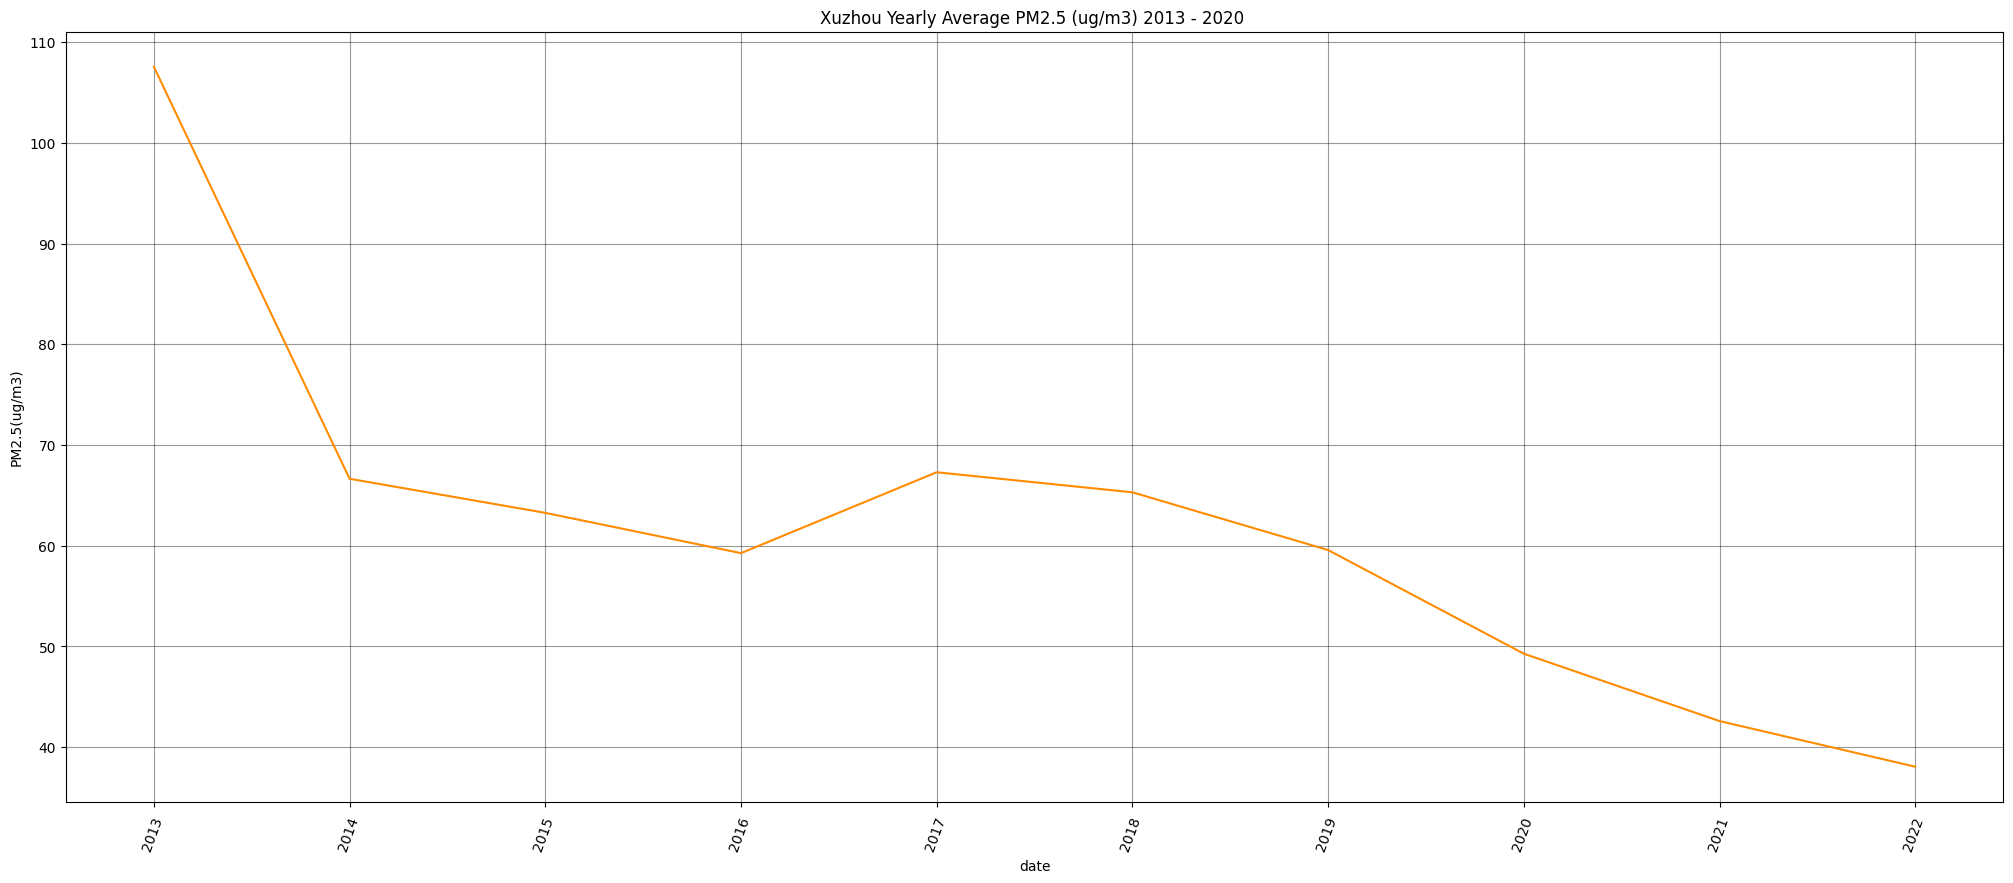

In [6]:
#为了更清楚地看到数据趋势，再次降低数据采样频率
df2=df.resample('Y').mean()   #年份采样，取年平均
 
#绘制折线图：
plt.figure(figsize=(25,10))
data=df2['PM2.5(μg/m3)']
#print(data.index)
#print(data.values)
 
_x=data.index
_y=data.values
_x = [i.strftime("%Y ") for i in _x]
plt.plot(range(len(_x)), _y,'darkorange')
plt.xticks(range(len(_x)), _x, rotation=70)
plt.grid(color='black', linestyle='-', linewidth=0.8,alpha=0.4)
plt.xlabel('date')
plt.ylabel('PM2.5(ug/m3)')
plt.title('Xuzhou Yearly Average PM2.5 (ug/m3) 2013 - 2020 ')
plt.savefig('Xuzhou Yearly Average PM2.5.png')
plt.show()

PM2.5含量逐年下降的主要原因可能是：

（1）政府出台相关政策，控制源头，加强工业粉尘治理

（2）城市汽车限行，控制尾气排放

（3）改善了能源消耗结构

（4）人们对PM2.5的危害有更加深刻的认识和了解


In [7]:
#为了接下来的数据处理和可视化，需要增加一些字段

df['dayofyear'] = df.index.dayofyear   #添加一年中第几天字段
df['dayofweek'] = df.index.dayofweek   #添加星期几字段（0-6）
df['season'] = df.index.quarter        #添加季节字段（1-4）
df['year']=df.index.year               #增加年字段


In [8]:
df.nsmallest(10,'PM2.5(μg/m3)')  #查看数据中某日PM2.5含量最低的前10名

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3),dayofyear,dayofweek,season,year
time_index,,,,,,,,,,,,,,
2019-08-11,2019-08-11,优,23,57,2,8,5,6,0.37,51,223,6,3,2019
2021-07-28,2021-07-28,优,13,10,4,6,6,7,0.43,41,209,2,3,2021
2022-08-28,2022-08-28,优,25,112,5,24,7,18,0.53,57,240,6,3,2022
2021-07-29,2021-07-29,优,13,9,5,7,6,7,0.43,40,210,3,3,2021
2022-07-06,2022-07-06,优,17,22,6,13,7,7,0.43,52,187,2,3,2022
2022-06-27,2022-06-27,优,23,80,6,16,7,11,0.40,67,178,0,2,2022
2021-07-17,2021-07-17,优,20,64,6,8,7,9,0.41,64,198,5,3,2021
2020-07-12,2020-07-12,优,22,71,6,7,5,14,0.58,71,194,6,3,2020
2020-06-17,2020-06-17,优,31,181,6,6,5,13,0.43,100,169,2,2,2020


In [9]:
df.nlargest(10,'PM2.5(μg/m3)')     #查看数据中某日PM2.5含量最高的前10名

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3),dayofyear,dayofweek,season,year
time_index,,,,,,,,,,,,,,
2014-01-17,2014-01-17,严重污染,333,177,288,377,102,70,2.50,10,17,4,1,2014
2014-02-01,2014-02-01,严重污染,331,181,285,381,42,35,2.89,9,32,5,1,2014
2013-12-05,2013-12-05,严重污染,311,97,283,383,98,90,3.29,24,339,3,4,2013
2016-12-20,2016-12-20,严重污染,329,329,279,368,60,78,2.30,27,355,1,4,2016
2017-12-30,2017-12-30,严重污染,326,358,275,370,12,67,2.29,17,364,5,4,2017
2016-12-19,2016-12-19,严重污染,334,332,275,401,115,118,3.03,12,354,0,4,2016
2018-01-18,2018-01-18,严重污染,319,358,268,296,23,63,1.97,25,18,3,1,2018
2017-05-06,2017-05-06,严重污染,499,365,267,751,24,46,0.87,75,126,5,2,2017
2013-12-03,2013-12-03,严重污染,252,86,265,387,138,116,3.43,15,337,1,4,2013


接着我们要用年份来分组，查看每年PM2.5含量数据的情况并画出相关数据图像

In [10]:
groupby_year=df['PM2.5(μg/m3)'].groupby(df['year'])  #按年划分数据
groupby_year.describe()  

#可以看到每年的PM2.5的 总和，平均值，最大最小值等等的数据都已自动算好

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,65.0,107.553846,58.486652,23.0,65.0,90.0,131.00,283.0
2014,361.0,66.645429,43.850523,9.0,37.0,57.0,85.00,288.0
2015,365.0,63.263014,38.306483,10.0,37.0,54.0,78.00,251.0
2016,366.0,59.262295,40.894278,13.0,33.0,46.0,72.75,279.0
2017,366.0,67.292350,42.352653,13.0,40.0,55.0,82.75,275.0
2018,355.0,65.301408,47.639855,8.0,33.0,51.0,79.50,268.0
2019,333.0,59.570571,34.737726,2.0,36.0,50.0,73.00,189.0
2020,366.0,49.281421,31.223455,6.0,30.0,39.0,58.00,182.0
2021,365.0,42.591781,27.102278,4.0,24.0,35.0,53.00,199.0


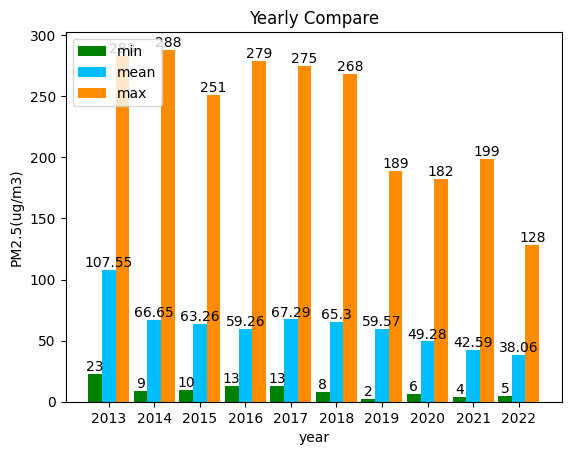

In [11]:
#绘制柱状图查看每年PM2.5最大、最小和平均含量
import numpy as np
year=['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
y1=groupby_year.min().tolist()    #最小值list

meanlist=groupby_year.mean().tolist()
y2=[round(i,2) for i in meanlist]    #平均值list只保留小数点后3位

y3=groupby_year.max().tolist()     #最大值list

x = np.arange(len(year))
width=0.3

plt.bar(x,y1,width=width,label='min',color='green')
plt.bar(x+width,y2,width=width,label='mean',color='deepskyblue',tick_label=year)
plt.bar(x+2*width,y3,width=width,label='max',color='darkorange')

#在图中每个柱条显示数据大小
for a,b in zip(x,y1):
    plt.text(a,b+0.1,b,ha='center',va='bottom')
for a,b in zip(x,y2):
    plt.text(a+width,b+0.1,b,ha='center',va='bottom')
for a,b in zip(x,y3):
    plt.text(a+2*width,b+0.1,b,ha='center', va='bottom')


plt.rcParams['figure.figsize']=(25.0,10.0)
plt.xlabel('year')
plt.ylabel('PM2.5(ug/m3)')
plt.xticks()
plt.legend(loc="upper left")
plt.title("Yearly Compare")
plt.savefig('Yearly compare.png')
plt.show()

接着绘制饼图查看每年空气污染程度占比，（这里排除了2013年和2020年的数据，因为数据不完整）

In [12]:
#按年划分数据，再按空气质量划分数据
df2014=df[df.year==2014]
groupby_quality2014=df2014['AQI'].groupby(df2014['quality'])  
groupby_quality2014.describe()   #2014年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
严重污染,8.0,302.250000,31.567388,257.0,279.75,301.0,331.50,342.0
中度污染,24.0,165.333333,13.140269,151.0,155.00,162.0,174.00,193.0
优,30.0,43.666667,5.827008,30.0,38.50,46.0,48.75,50.0
良,200.0,75.395000,13.441067,51.0,63.00,76.0,87.00,100.0
轻度污染,87.0,122.459770,14.120581,101.0,111.00,121.0,135.00,150.0
重度污染,12.0,220.833333,14.018386,202.0,207.50,223.5,230.25,242.0


In [13]:
df2015=df[df.year==2015]
groupby_quality2015=df2015['AQI'].groupby(df2015['quality']) 
groupby_quality2015.describe()   #2015年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
严重污染,1.0,302.000000,NaN,302.0,302.0,302.0,302.00,302.0
中度污染,27.0,171.444444,14.391058,151.0,157.5,168.0,182.00,195.0
优,27.0,40.407407,6.517782,28.0,37.5,41.0,46.00,50.0
良,209.0,76.258373,13.717277,51.0,66.0,76.0,87.00,100.0
轻度污染,84.0,122.059524,16.352555,101.0,107.0,119.0,137.25,150.0
重度污染,17.0,218.588235,12.420038,201.0,212.0,218.0,231.00,235.0


In [14]:
df2016=df[df.year==2016]
groupby_quality2016=df2016['AQI'].groupby(df2016['quality'])  
groupby_quality2016.describe()   #2016年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
严重污染,4.0,297.750000,39.024565,264.0,264.0,296.5,330.25,334.0
中度污染,29.0,168.586207,13.945089,151.0,158.0,164.0,182.00,199.0
优,31.0,43.612903,5.345886,32.0,39.0,45.0,48.00,50.0
良,223.0,74.484305,12.758268,51.0,64.0,74.0,85.00,100.0
轻度污染,68.0,120.308824,13.913654,102.0,106.0,119.0,130.25,150.0
重度污染,11.0,221.727273,16.876557,201.0,209.5,217.0,237.00,248.0


In [15]:
df2017=df[df.year==2017]
groupby_quality2017=df2017['AQI'].groupby(df2017['quality'])  
groupby_quality2017.describe()   #2017年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
严重污染,6.0,330.166667,85.049201,271.0,286.25,299.5,322.5,499.0
中度污染,26.0,172.423077,15.344505,151.0,160.00,170.0,186.5,199.0
优,21.0,42.000000,6.131884,30.0,38.00,44.0,47.0,50.0
良,189.0,79.761905,13.191367,51.0,70.00,81.0,92.0,100.0
轻度污染,111.0,119.954955,14.083122,101.0,107.00,117.0,131.0,150.0
重度污染,13.0,225.769231,13.147584,204.0,215.00,227.0,235.0,245.0


In [16]:
df2018=df[df.year==2018]
groupby_quality2018=df2018['AQI'].groupby(df2018['quality'])  
groupby_quality2018.describe()   #2018年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
严重污染,12.0,285.416667,20.165039,256.0,275.0,280.0,296.75,319.0
中度污染,28.0,170.321429,12.812186,151.0,161.0,170.0,177.25,199.0
优,31.0,40.354839,7.926951,18.0,35.0,42.0,47.50,50.0
良,195.0,76.641026,12.802801,51.0,67.0,76.0,88.00,100.0
轻度污染,79.0,120.050633,14.246816,101.0,108.5,116.0,134.50,148.0
重度污染,10.0,216.900000,13.245125,202.0,212.5,215.0,218.00,250.0


In [17]:
df2019=df[df.year==2019]
groupby_quality2019=df2019['AQI'].groupby(df2019['quality'])  
groupby_quality2019.describe()    #2019年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
严重污染,1.0,279.000000,NaN,279.0,279.00,279.0,279.0,279.0
中度污染,23.0,170.956522,11.956277,152.0,163.50,174.0,178.5,194.0
优,33.0,41.151515,8.617284,23.0,36.00,42.0,49.0,50.0
良,209.0,76.779904,14.079424,51.0,65.00,78.0,88.0,100.0
轻度污染,55.0,119.709091,12.953868,101.0,107.00,119.0,129.5,150.0
重度污染,12.0,217.333333,11.243854,205.0,208.75,214.0,221.5,240.0


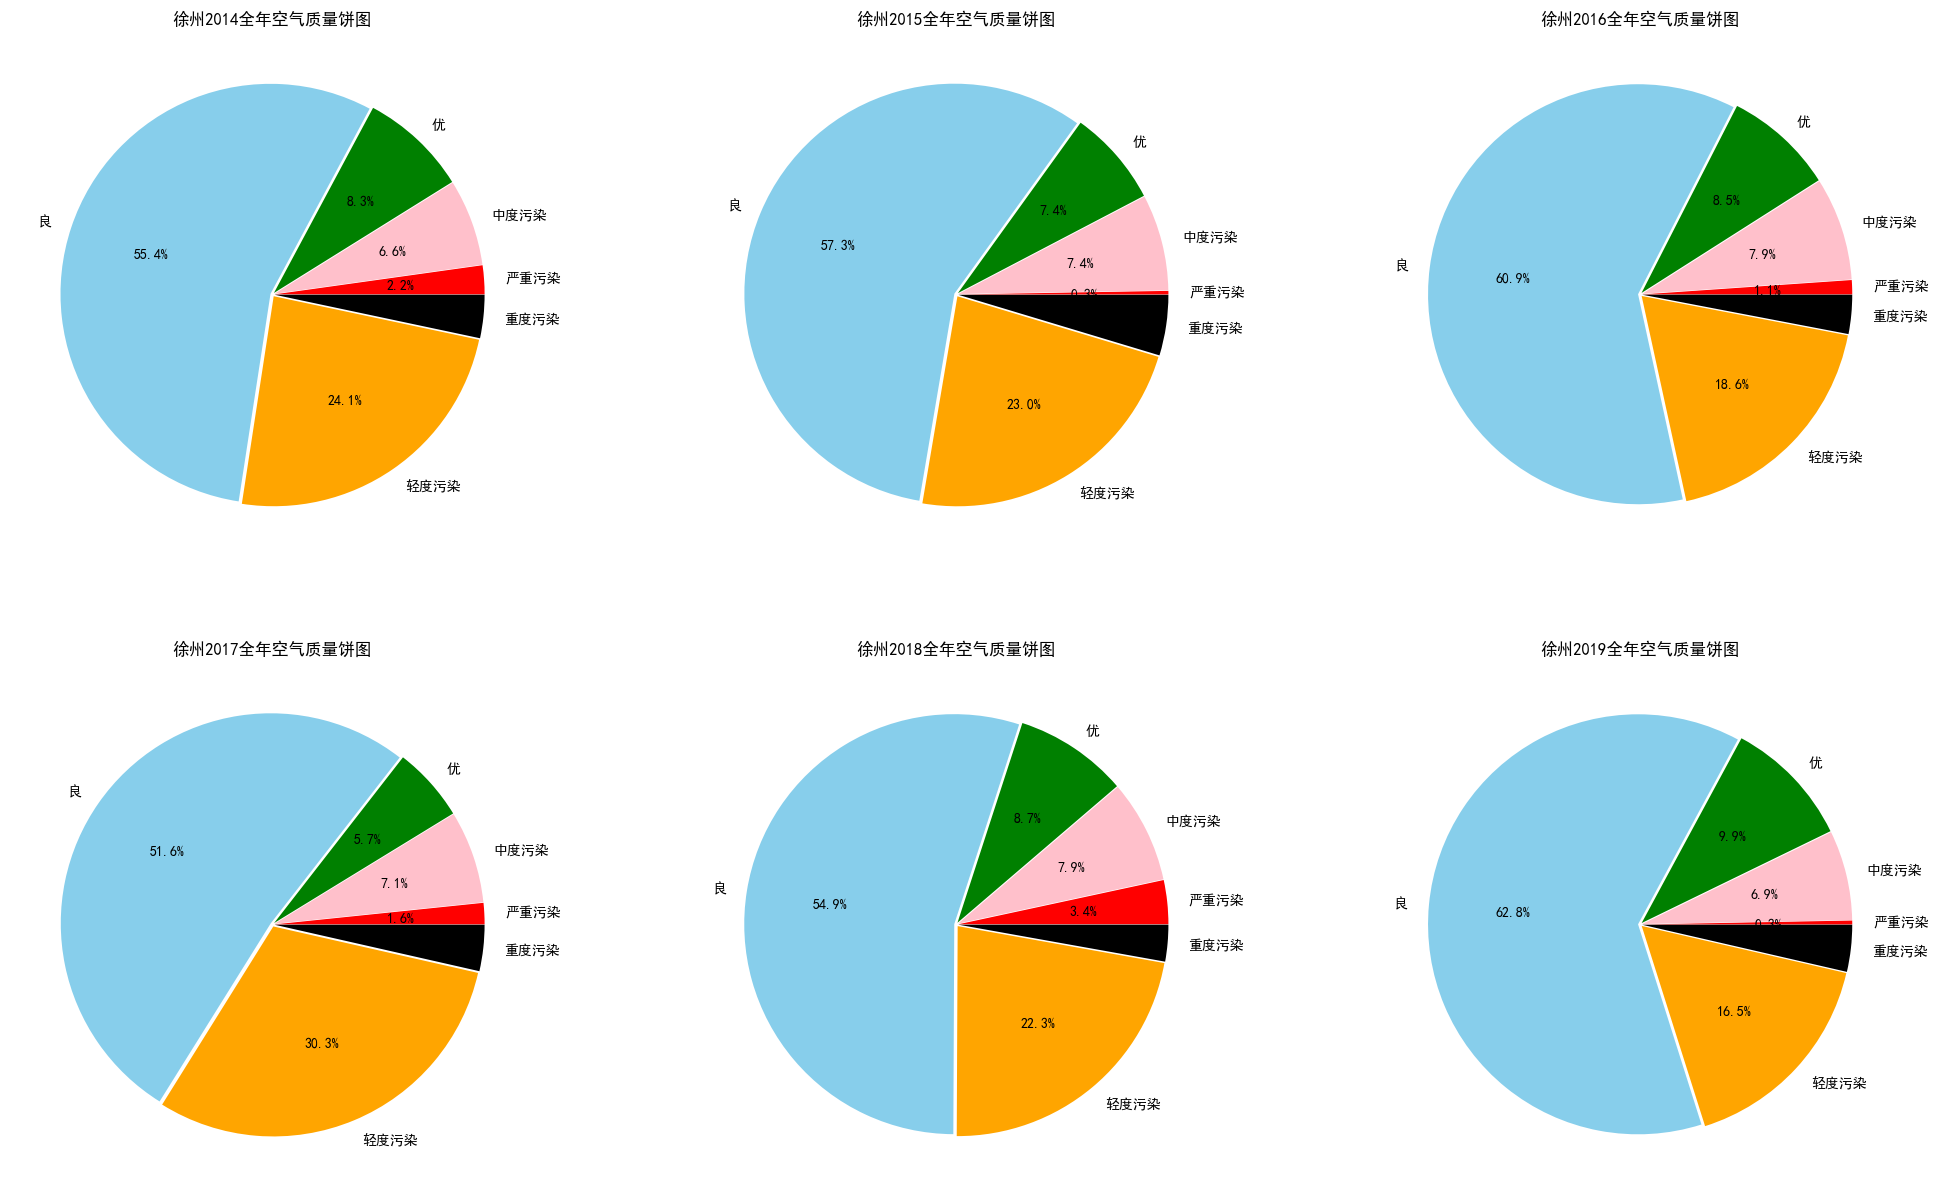

In [18]:
#绘制饼图
# labels=['中度污染','优','良','轻度污染']
labels=['严重污染','中度污染','优','良','轻度污染','重度污染']
colors=['red','pink','green','skyblue','orange','black']
labels1=['优','良','轻度污染']
count2014=groupby_quality2014.count().tolist()
count2015=groupby_quality2015.count().tolist()
count2016=groupby_quality2016.count().tolist()
count2017=groupby_quality2017.count().tolist()
count2018=groupby_quality2018.count().tolist()
count2019=groupby_quality2019.count().tolist()

ex=[0.01,0.01,0.01,0.01,0.01,0.01]
ex1=[0.01,0.01,0.01]

pic=plt.figure(figsize=(25,15))

a1=pic.add_subplot(2,3,1)
plt.rcParams['font.sans-serif']='SimHei'
plt.pie(count2014,explode=ex,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('徐州2014全年空气质量饼图')

a1=pic.add_subplot(2,3,2)
plt.pie(count2015,explode=ex,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('徐州2015全年空气质量饼图')

a1=pic.add_subplot(2,3,3)
plt.pie(count2016,explode=ex,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('徐州2016全年空气质量饼图')

a1=pic.add_subplot(2,3,4)
plt.pie(count2017,explode=ex,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('徐州2017全年空气质量饼图')

a1=pic.add_subplot(2,3,5)
plt.pie(count2018,explode=ex,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('徐州2018全年空气质量饼图')

a1=pic.add_subplot(2,3,6)
plt.pie(count2019,explode=ex,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('徐州2019全年空气质量饼图')

plt.savefig('pie.png')



C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_30068\3747663251.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  PM_corr = df.corr()
d:\big_data_test\envi\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_30068\3747663251.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('heatmap.png')
d:\big_data_test\envi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


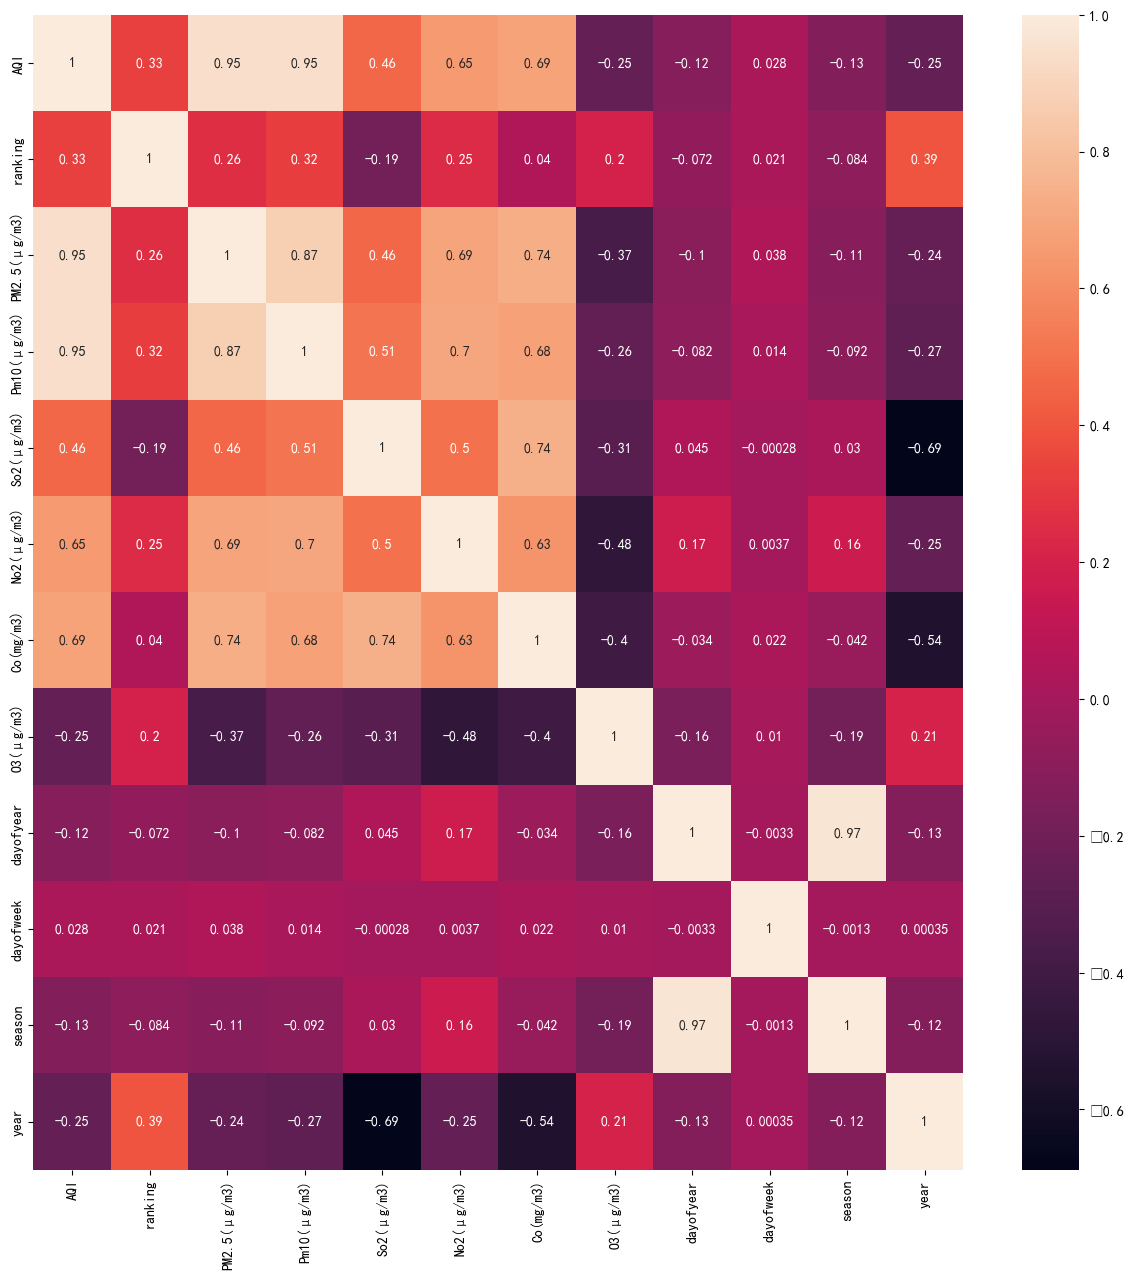

In [19]:
import seaborn as sns
#画出热力图，查看字段间的相关性
#相关系数的绝对值在【0.5,1】之间是强相关  【0.2,0.5】之间是有一定相关  小于0.1或0.05是无相关
PM_corr = df.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(PM_corr,annot=True)
plt.savefig('heatmap.png')

#注重分析PM2.5字段和其他字段的关系

根据热力图可以得出结论：

（1）PM2.5含量与O3含量有一定相关性，与CO，NO2，SO2的含量强相关。主要原因是这些气体都是污染气体。

（2）PM2.5的含量与AQI指数强相关，即PM2.5的含量影响着AQI指数。

（3）PM2.5与年之间是负相关，含量逐年减少

（4）PM2.5与季节的相关性不大


接着使用 普通线性回归模型、岭回归模型和Lasso回归模型  3种不同的回归模型来预测数据。

第一步划分训练集和测试集

In [20]:
split_percent=0.1
data_train=df.iloc[int(len(df)*split_percent):]  #前80%的数据划为训练集 
data_test=df.iloc[:int(len(df)*split_percent)]   #剩余20%划为测试集   

test_time=data_test['date']
#type(test_time)
data_test    #测试集数据范围是2019年1月17日 —— 2020年5月1日
#data_train

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3),dayofyear,dayofweek,season,year
time_index,,,,,,,,,,,,,,
2022-08-01,2022-08-01,优,40,167,20,40,6,17,0.50,76,213,0,3,2022
2022-08-02,2022-08-02,优,46,212,23,43,6,17,0.50,85,214,1,3,2022
2022-08-03,2022-08-03,良,59,304,32,55,7,16,0.55,116,215,2,3,2022
2022-08-04,2022-08-04,良,58,316,31,54,6,15,0.54,121,216,3,3,2022
2022-08-05,2022-08-05,良,51,296,28,52,6,16,0.57,117,217,4,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-10,2021-10-10,优,48,315,27,48,5,25,0.75,40,283,6,4,2021
2021-10-11,2021-10-11,优,39,284,14,41,8,31,0.55,52,284,0,4,2021
2021-10-12,2021-10-12,优,49,318,22,55,6,40,0.55,54,285,1,4,2021


In [21]:
#剔除字符串字段
data_train=data_train.drop(['date','quality'], axis = 1)
data_test=data_test.drop(['date','quality'], axis = 1)

In [22]:
y_train=data_train['PM2.5(μg/m3)'].values
x_train=data_train.drop('PM2.5(μg/m3)', axis = 1).values

y_true=data_test['PM2.5(μg/m3)'].values
x_test=data_test.drop('PM2.5(μg/m3)', axis = 1).values

In [23]:
y_true   #PM2.5含量真实值（2019-01-17 ——  2020-05-01）

array([ 20,  23,  32,  31,  28,  18,  14,  16,  24,  41,  42,  16,  18,
        16,  16,  19,  12,  18,  25,  16,  14,  16,  10,   9,  25,  34,
        18,   5,  15,  10,  19,  20,  20,  14,  14,  22,   6,  12,  22,
        14,  12,  36,  27,  26,  21,  31,  27,  15,  21,  30,  20,  23,
        22,   9,  24,  27,  15,  29,  20,  19,  11,  19,  31,  33,  33,
        26,  42,  35,  12,  19,  32,  31,  24,  21,  22,  13,  19,  35,
        23,  18,  28,  19,  22,  16,  13,  20,  15,  17,   6,  13,  20,
        15,  26,  27,  31,  25,  24,  26,  28,  15,  24,  25,  31,  29,
        33,  31,  20,  20,  23,  25,  33,  25,  27,  36,  29,  25,  28,
        10,  23,  28,  23,  14,  22,  25,  21,  31,  36,  34,  37,  54,
        48,  25,  30,  38,  35,  18,  25,  29,  21,  29,  36,  36,  44,
        24,  38,  34,  35,  36,  30,  25,  20,  40,  57,  62,  41,  58,
        46,  29,  24,  33,  51,  49,  69,  72,  67, 100,  92,  45,  79,
        24,  32,  57,  43,  32,  39,  33,  41,  37,  45,  25,  1

使用普通的线性回归模型

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

np.around(y_pred,decimals=1)  #控制输出小数点后一位
#PM2.5含量 普通线性回归模型 预测结果

array([ 18.2,  21.4,  26.2,  24.6,  20.3,  17.9,  13.1,  14.5,  19.4,
        35.8,  34.1,  20.9,  17.9,  18.6,  15.7,  19.9,  14.8,  14.6,
        20.1,  17.1,  15.5,  17.1,  15.1,  17.3,  28.3,  28.7,  23.1,
        12.3,  16.7,  14.8,  18.3,  17.5,  18.1,  12.4,  11.4,  17.6,
         5.5,  12. ,  34.7,  18.6,  13.6,  27. ,  19.8,  23. ,  27.3,
        37.7,  21.1,  13. ,  20.1,  23.9,  16.4,  17.7,  21.7,  11.6,
        21.8,  23.2,  14.1,  22.4,  19.9,  14.5,  11.5,  16.6,  43.8,
        45.3,  36.6,  24.3,  45. ,  39.3,  21.2,  35.8,  42.3,  37.1,
        30.5,  25.5,  22.7,  19.7,  39.6,  46.7,  35.2,  24.5,  43.2,
        18.9,  16.2,  14.7,  12.2,  31.1,  16.1,  19.8,   7.1,  10.5,
        21.3,  17.9,  29.8,  28.5,  34.9,  26.5,  24.9,  25.7,  30.9,
        20.5,  27.2,  21.7,  28.4,  23.2,  29.4,  34.6,  22.7,  23. ,
        25. ,  25.2,  32.9,  24. ,  34.4,  43.9,  38.5,  24.3,  26.7,
        18.9,  34.1,  33.9,  24.7,  20.9,  29.5,  21.8,  17.6,  23. ,
        25.9,  28.9,

接着使用岭回归模型

In [25]:
#先选取最佳alpha参数
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100])
ridgecv.fit(x_train, y_train)
ridgecv.alpha_  

0.01

In [26]:
reg=Ridge(alpha = 0.1)  #使用上面的alpha参数
reg.fit(x_train, y_train)
y_pred_reg=reg.predict(x_test)

np.around(y_pred_reg,decimals=1)  #控制输出小数点后一位
#PM2.5含量 岭回归模型 预测结果

array([ 18.2,  21.4,  26.2,  24.6,  20.3,  17.9,  13.1,  14.5,  19.4,
        35.8,  34.1,  20.9,  17.9,  18.6,  15.7,  19.9,  14.8,  14.6,
        20.1,  17.1,  15.5,  17.1,  15.1,  17.3,  28.3,  28.7,  23.1,
        12.3,  16.7,  14.8,  18.3,  17.5,  18.1,  12.4,  11.4,  17.6,
         5.5,  12. ,  34.7,  18.6,  13.6,  27. ,  19.8,  23. ,  27.3,
        37.7,  21.1,  13. ,  20.1,  23.9,  16.4,  17.7,  21.7,  11.6,
        21.8,  23.2,  14.1,  22.4,  19.9,  14.5,  11.5,  16.6,  43.8,
        45.3,  36.6,  24.3,  45. ,  39.3,  21.2,  35.8,  42.3,  37.1,
        30.5,  25.5,  22.7,  19.7,  39.6,  46.7,  35.2,  24.5,  43.2,
        18.9,  16.2,  14.7,  12.2,  31.1,  16.1,  19.8,   7.1,  10.5,
        21.3,  17.9,  29.8,  28.5,  34.9,  26.5,  24.9,  25.7,  30.9,
        20.5,  27.2,  21.7,  28.4,  23.2,  29.4,  34.6,  22.7,  23. ,
        25. ,  25.2,  32.9,  24. ,  34.4,  43.9,  38.5,  24.3,  26.7,
        18.9,  34.1,  33.9,  24.7,  20.9,  29.5,  21.8,  17.6,  23. ,
        25.9,  28.9,

最后使用Lasso回归模型

In [27]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
y_pred_lasso=lasso.predict(x_test)
np.around(y_pred_lasso,decimals=1)  #控制输出小数点后一位
#PM2.5含量 Lasso回归模型 预测结果

array([ 18.1,  21.3,  26.2,  24.5,  20.3,  17.9,  13.1,  14.5,  19.4,
        35.7,  34. ,  20.8,  17.8,  18.6,  15.7,  19.8,  14.7,  14.5,
        20.1,  17. ,  15.4,  17.1,  15.1,  17.2,  28.3,  28.6,  23. ,
        12.2,  16.6,  14.7,  18.3,  17.4,  17.9,  12.3,  11.3,  17.5,
         5.3,  11.9,  34.6,  18.5,  13.5,  26.8,  19.7,  22.9,  27.2,
        37.5,  21. ,  12.9,  20. ,  23.8,  16.3,  17.6,  21.6,  11.5,
        21.7,  23.1,  14. ,  22.3,  19.8,  14.4,  11.4,  16.5,  43.7,
        45.3,  36.6,  24.3,  45. ,  39.3,  21.2,  35.8,  42.3,  37.1,
        30.5,  25.5,  22.7,  19.7,  39.6,  46.7,  35.2,  24.5,  43.1,
        18.9,  16.2,  14.7,  12.2,  31.1,  16.2,  19.8,   7.1,  10.5,
        21.3,  17.9,  29.8,  28.4,  34.9,  26.5,  24.8,  25.6,  30.8,
        20.5,  27.2,  21.7,  28.4,  23.1,  29.3,  34.6,  22.7,  23. ,
        24.9,  25.1,  32.8,  23.9,  34.4,  43.9,  38.5,  24.3,  26.7,
        18.9,  34.1,  33.9,  24.7,  21. ,  29.5,  21.7,  17.5,  22.9,
        25.8,  28.8,

三种回归模型的评价


In [28]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

print('线性回归模型评价')
print('数据线性回归模型的平均绝对误差为',mean_absolute_error(y_true,y_pred).round(8))
print('数据线性回归模型的均方误差为',mean_squared_error(y_true,y_pred).round(8))
print('数据线性回归模型的中值绝对误差为',median_absolute_error(y_true,y_pred).round(8))
print('数据线性回归模型的可解释方差值为',explained_variance_score(y_true,y_pred).round(8))
print('数据线性回归模型的R方值为',r2_score(y_true,y_pred).round(8))

线性回归模型评价
数据线性回归模型的平均绝对误差为 5.1080802
数据线性回归模型的均方误差为 49.45353561
数据线性回归模型的中值绝对误差为 4.01169371
数据线性回归模型的可解释方差值为 0.93953632
数据线性回归模型的R方值为 0.93768774


In [29]:
print('岭回归模型评价')
print('数据岭回归模型的平均绝对误差为',mean_absolute_error(y_true,y_pred_reg).round(8))
print('数据岭回归模型的均方误差为',mean_squared_error(y_true,y_pred_reg).round(8))
print('数据岭回归模型的中值绝对误差为',median_absolute_error(y_true,y_pred_reg).round(8))
print('数据岭回归模型的可解释方差值为',explained_variance_score(y_true,y_pred_reg).round(8))
print('数据岭回归模型的R方值为',r2_score(y_true,y_pred_reg).round(8))

岭回归模型评价
数据岭回归模型的平均绝对误差为 5.10821229
数据岭回归模型的均方误差为 49.45514414
数据岭回归模型的中值绝对误差为 4.01311705
数据岭回归模型的可解释方差值为 0.9395313
数据岭回归模型的R方值为 0.93768571


In [30]:
print('Lasso回归模型评价')
print('数据Lasso回归模型的平均绝对误差为',mean_absolute_error(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的均方误差为',mean_squared_error(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的中值绝对误差为',median_absolute_error(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的可解释方差值为',explained_variance_score(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的R方值为',r2_score(y_true,y_pred_lasso).round(8))

Lasso回归模型评价
数据Lasso回归模型的平均绝对误差为 5.1161016
数据Lasso回归模型的均方误差为 49.54609376
数据Lasso回归模型的中值绝对误差为 4.07213418
数据Lasso回归模型的可解释方差值为 0.93930702
数据Lasso回归模型的R方值为 0.93757112


绘制折线图，看不同模型间的拟合程度

首先将预测的结果转为 DataFrame

In [31]:
#真实值
time=test_time.values
df_true=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_true})
df_true['time_index'] = pd.to_datetime(df_true['date']) #把时间字符串转为索引
df_true.set_index('time_index',inplace=True)
#df_true

#普通线性回归模型预测的结果
df_mod1=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_pred})
df_mod1['time_index'] = pd.to_datetime(df_mod1['date']) #把时间字符串转为索引
df_mod1.set_index('time_index',inplace=True)
#df_mod1

#岭回归模型预测的结果
df_mod2=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_pred_reg})
df_mod2['time_index'] = pd.to_datetime(df_mod2['date']) #把时间字符串转为索引
df_mod2.set_index('time_index',inplace=True)
#df_mod2

#Lasso回归模型预测的结果
df_mod3=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_pred_lasso})
df_mod3['time_index'] = pd.to_datetime(df_mod3['date']) #把时间字符串转为索引
df_mod3.set_index('time_index',inplace=True)
#df_mod3

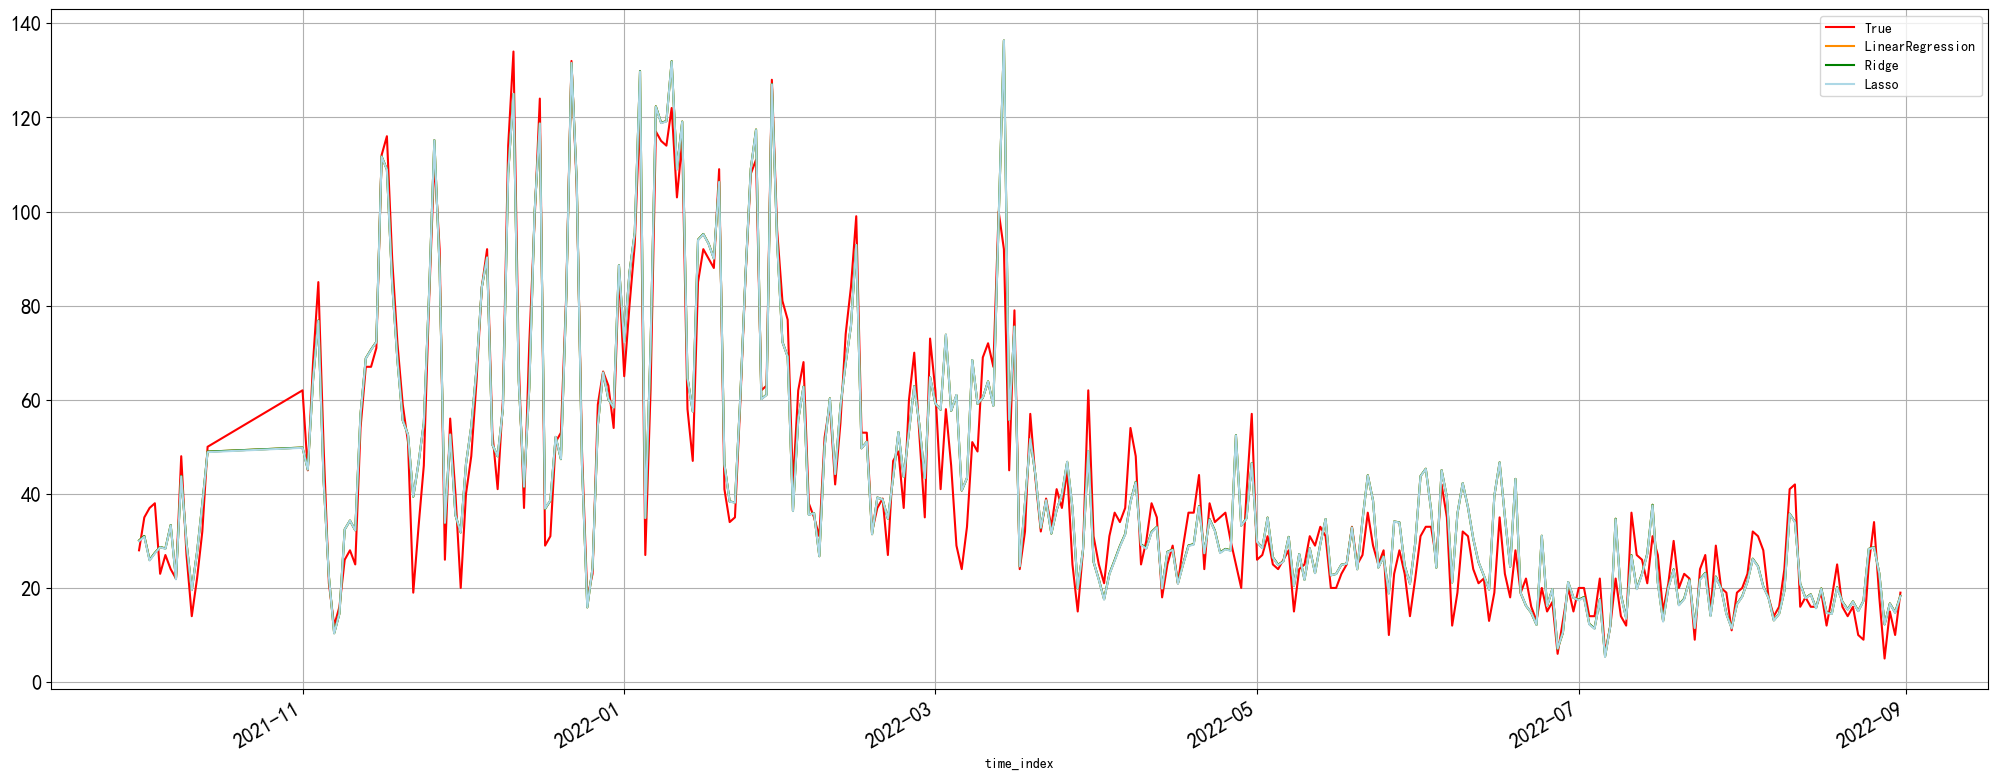

In [32]:
#绘制图像
df_true['PM2.5(μg/m3)'].plot(figsize=(25,10),color='red', grid=True,fontsize=15,label='True')                       #真实数据
df_mod1['PM2.5(μg/m3)'].plot(figsize=(25,10),color='darkorange', grid=True,fontsize=15,label='LinearRegression')     #普通线性回归模型预测数据
df_mod2['PM2.5(μg/m3)'].plot(figsize=(25,10),color='green', grid=True,fontsize=15,label='Ridge')                    #岭回归模型预测数据
df_mod3['PM2.5(μg/m3)'].plot(figsize=(25,10),color='lightblue', grid=True,fontsize=15,label='Lasso')                 #Lasso回归模型预测数据
plt.xticks()
plt.legend(loc="upper right")
plt.savefig('Model Compare.png')


从图中也可以看到，三种模型预测的结果差别不大